In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def print_cm(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']] 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [3]:
#read in dataset
df = pd.read_csv('./combined.csv')

In [4]:
# frequency analyis for AOTRoute
df['AOTROUTE'].value_counts().head(20)

# scale down
AOTRoute = pd.Series(np.where(((df['AOTROUTE'] != 'US-7')&(df['AOTROUTE'] != 'I-89')&
                            (df['AOTROUTE'] != 'I-91')&(df['AOTROUTE'] != 'US-2')&
                            (df['AOTROUTE'] != 'US-5')&(df['AOTROUTE'] != 'VT-15')&
                            (df['AOTROUTE'] != 'VT-100')&(df['AOTROUTE'] != 'VT-9')&
                            (df['AOTROUTE'] != 'VT-2A')&(df['AOTROUTE'] != 'US-4')),'Other Route',df.AOTROUTE))
AOTRoute = pd.get_dummies(AOTRoute)


# get dummies for animal --> get "none" column for yes/no
animal = pd.get_dummies(df['Animal'])['None/Other']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
animal = pd.Series(np.where(np.array(animal)==0,1,0))


# frequency analyis for CITYORTOWN
df['CITYORTOWN'].value_counts().head(20)

# scale down
city_town = pd.Series(np.where(((df['CITYORTOWN'] != 'Burlington')&(df['CITYORTOWN'] != 'Brattleboro')&
                            (df['CITYORTOWN'] != 'South Burlington')&(df['CITYORTOWN'] != 'Essex')&
                            (df['CITYORTOWN'] != 'Bennington')&(df['CITYORTOWN'] != 'Williston')&
                            (df['CITYORTOWN'] != 'Colchester')&(df['CITYORTOWN'] != 'Springfield')&
                            (df['CITYORTOWN'] != 'Hartford')&(df['CITYORTOWN'] != 'Milton')),'Other City',df.CITYORTOWN))
city_town = pd.get_dummies(city_town)


# DayNight --> save "night" case only as yes/no
night=pd.get_dummies(df['DayNight'])['Night']

# Impairment --> get "none" column for yes/no
impairment=pd.get_dummies(df['Impairment'])['None']
#recode 0 to 1 and 1 to 0; this way a 1 is yes
impairment = pd.Series(np.where(np.array(impairment)==0,1,0))

# get dummies for Injury
injury = pd.get_dummies(df['InjuryType'])
# remove "property damage only" which is the null case
injury = injury.drop(columns=['Property Damage Only'])

# get dummies for Involving
involving = pd.get_dummies(df['Involving'])
# remove "none" column which is the null case
involving = involving.drop(columns = ['None'])

# Get dummies for road condition
roadcondition = pd.get_dummies(df['RoadCondition'])
# drop "none" column which is the null case, unreported situations, and the surface condition; will add in later
roadcondition = roadcondition.drop(columns=['None', 'Other - Explain in Narrative', 'Not reported', 'Unknown',
                                            'Road Surface Condition(wet, icy, snow, slush, etc)'])

# get dummies for surface condition
surfacecondition = pd.get_dummies(df['SurfaceCondition'])
# drop "dry" column which is the null case along with unreported situations
surfacecondition = surfacecondition.drop(columns=['Dry', 'Not Reported', 'Other - Explain in Narrative', 'Unknown'])

# get dummies for weather
weather = pd.get_dummies(df['Weather'])
# drop "clear" column which is the null case along with unreported situations
weather = weather.drop(columns=['Clear', 'Unknown'])


# get accident dates
datetime = df['ACCIDENTDATE']
months = '' # new string
# use loop to extract month from date string
for i in range(len(datetime)):
    match = re.search(r'\d{4}-\d{2}-\d{2}', datetime[i]).group()
    months += match[5:7] + ','
# remove last extraneous comma from loop
months = months[:-1]
# split comma separated string
months = months.split(",")
# convert to DataFrame
months = pd.Series(months)

# determine season
seasons = ""
for i in range(len(months)):
    if months[i]=='12':
        seasons += 'Winter' + ','
    if months[i]=='01':
        seasons += 'Winter' + ','
    if months[i]=='02':
        seasons += 'Winter' + ','
    if months[i]=='03':
        seasons += 'Spring' + ','
    if months[i]=='04':
        seasons += 'Spring' + ','
    if months[i]=='05':
        seasons += 'Spring' + ','
    if months[i]=='06':
        seasons += 'Summer' + ','
    if months[i]=='07':
        seasons += 'Summer' + ','
    if months[i]=='08':
        seasons += 'Summer' + ','
    if months[i]=='09':
        seasons += 'Fall' + ','
    if months[i]=='10':
        seasons += 'Fall' + ','
    if months[i]=='11':
        seasons += 'Fall' + ','
# remove last extraneous comma from loop
seasons = seasons[:-1]
# split comma separated string
seasons = seasons.split(",")
# convert to DataFrame
seasons = pd.Series(seasons)
seasons = pd.get_dummies(seasons)

# Build data frame for PCA
pca_df = pd.concat([animal, night, impairment], axis=1)
pca_df.columns=['Animal', 'Night', 'Impairment']
pca_df = pd.concat([pca_df, AOTRoute, city_town, injury, involving, roadcondition, surfacecondition, weather, seasons],
                   axis=1, sort=False)
pca_df

,Animal,Night,Impairment,I-89,I-91,Other Route,US-2,US-4,US-5,US-7,...,Water (standing / moving),Wet,Cloudy,Freezing Precipitation,Rain,Wind,Fall,Spring,Summer,Winter
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49631,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
49632,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49633,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
49634,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [5]:
pca_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Animal,49636.0,0.032053,0.176144,0.0,0.0,0.0,0.0,1.0
Night,49636.0,0.246938,0.431235,0.0,0.0,0.0,0.0,1.0
Impairment,49636.0,0.052905,0.223846,0.0,0.0,0.0,0.0,1.0
I-89,49636.0,0.067935,0.251636,0.0,0.0,0.0,0.0,1.0
I-91,49636.0,0.044988,0.207279,0.0,0.0,0.0,0.0,1.0
Other Route,49636.0,0.627105,0.483579,0.0,0.0,1.0,1.0,1.0
US-2,49636.0,0.041059,0.198428,0.0,0.0,0.0,0.0,1.0
US-4,49636.0,0.014506,0.119564,0.0,0.0,0.0,0.0,1.0
US-5,49636.0,0.038641,0.192741,0.0,0.0,0.0,0.0,1.0
US-7,49636.0,0.079136,0.269954,0.0,0.0,0.0,0.0,1.0


In [14]:
pca_df[pca_df.Injury==1]

,Animal,Night,Impairment,I-89,I-91,Other Route,US-2,US-4,US-5,US-7,...,Water (standing / moving),Wet,Cloudy,Freezing Precipitation,Rain,Wind,Fall,Spring,Summer,Winter
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49603,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
49608,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
49617,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
49623,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = pca_df[pca_df.Injury==0]
df_minority = pca_df[pca_df.Injury==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=9791,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.describe()

,Animal,Night,Impairment,I-89,I-91,Other Route,US-2,US-4,US-5,US-7,...,Water (standing / moving),Wet,Cloudy,Freezing Precipitation,Rain,Wind,Fall,Spring,Summer,Winter
count,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,...,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000,19582.000000
mean,0.025074,0.258962,0.071086,0.075784,0.046369,0.611735,0.041722,0.015627,0.040394,0.078950,...,0.002604,0.131652,0.157543,0.093657,0.059034,0.002502,0.235063,0.215555,0.242161,0.307221
std,0.156354,0.438076,0.256974,0.264659,0.210289,0.487368,0.199958,0.124029,0.196887,0.269668,...,0.050968,0.338120,0.364321,0.291359,0.235694,0.049962,0.424049,0.411217,0.428402,0.461354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
y = df_downsampled['Injury']
x = df_downsampled.drop(columns = ['Fatal', 'Injury'])

In [24]:
from sklearn.model_selection import train_test_split

# 20-80% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_x,test_x = train_test_split(y, x,
                                                 test_size=0.25,
                                                 random_state=123)

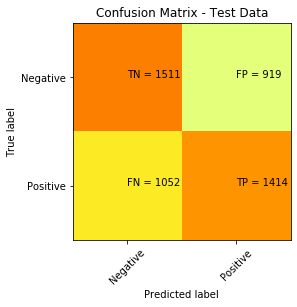

              precision    recall  f1-score   support

           0       0.59      0.62      0.61      2430
           1       0.61      0.57      0.59      2466

    accuracy                           0.60      4896
   macro avg       0.60      0.60      0.60      4896
weighted avg       0.60      0.60      0.60      4896



In [25]:
from sklearn import tree
# Decision trees for classification, use entropy criterion (gini by default)
dt = tree.DecisionTreeClassifier(max_features='sqrt')
dt = dt.fit(train_x, train_y)
pred_y_dt = dt.predict(test_x)
print_cm(metrics.confusion_matrix(test_y, pred_y_dt))
print(metrics.classification_report(test_y, pred_y_dt))

In [26]:
metrics.accuracy_score(test_y, pred_y_dt)

0.5974264705882353

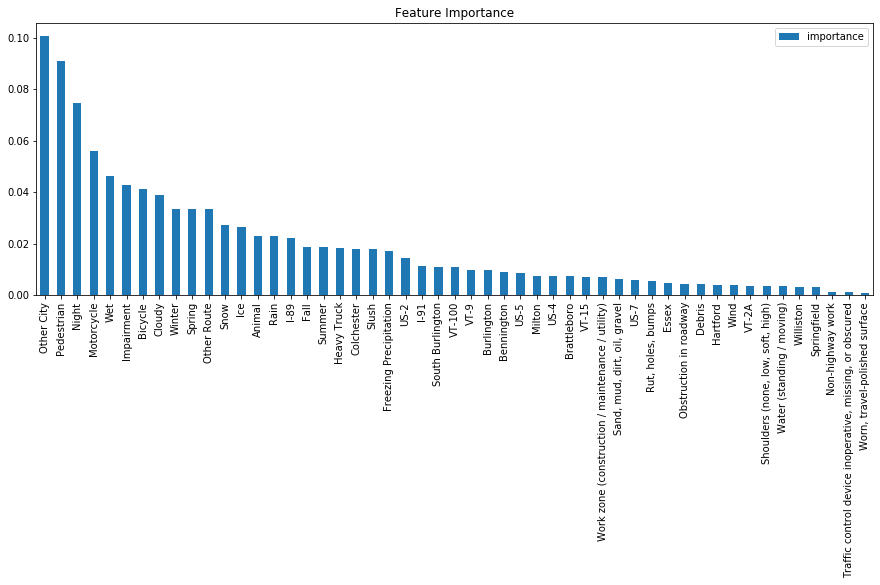

In [27]:
# importance scores
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = train_x.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

#bar chart
feature_importances.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance')

In [28]:
# Select the 10 most importance features
train_x_imp = train_x[feature_importances.index[range(15)]]
train_x_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 38818 to 29219
Data columns (total 15 columns):
Other City     14686 non-null uint8
Pedestrian     14686 non-null uint8
Night          14686 non-null uint8
Motorcycle     14686 non-null uint8
Wet            14686 non-null uint8
Impairment     14686 non-null int64
Bicycle        14686 non-null uint8
Cloudy         14686 non-null uint8
Winter         14686 non-null uint8
Spring         14686 non-null uint8
Other Route    14686 non-null uint8
Snow           14686 non-null uint8
Ice            14686 non-null uint8
Animal         14686 non-null int64
Rain           14686 non-null uint8
dtypes: int64(2), uint8(13)
memory usage: 530.6 KB


In [29]:
test_x_imp = test_x[feature_importances.index[range(15)]]
test_x_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 25880 to 12978
Data columns (total 15 columns):
Other City     4896 non-null uint8
Pedestrian     4896 non-null uint8
Night          4896 non-null uint8
Motorcycle     4896 non-null uint8
Wet            4896 non-null uint8
Impairment     4896 non-null int64
Bicycle        4896 non-null uint8
Cloudy         4896 non-null uint8
Winter         4896 non-null uint8
Spring         4896 non-null uint8
Other Route    4896 non-null uint8
Snow           4896 non-null uint8
Ice            4896 non-null uint8
Animal         4896 non-null int64
Rain           4896 non-null uint8
dtypes: int64(2), uint8(13)
memory usage: 176.9 KB


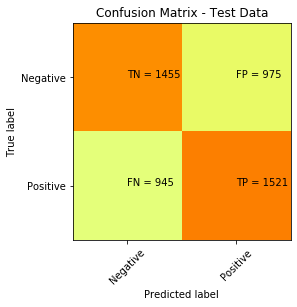

              precision    recall  f1-score   support

           0       0.61      0.60      0.60      2430
           1       0.61      0.62      0.61      2466

    accuracy                           0.61      4896
   macro avg       0.61      0.61      0.61      4896
weighted avg       0.61      0.61      0.61      4896



In [30]:
# Decision trees for classification, use entropy criterion (gini by default)
dt2 = tree.DecisionTreeClassifier(max_features='sqrt')
dt2 = dt2.fit(train_x_imp, train_y)
pred_y_dt2 = dt2.predict(test_x_imp)
print_cm(metrics.confusion_matrix(test_y, pred_y_dt2))
print(metrics.classification_report(test_y, pred_y_dt2))

In [31]:
# Select the 10 most importance features
train_x_imp10 = train_x[feature_importances.index[range(10)]]
train_x_imp10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 38818 to 29219
Data columns (total 10 columns):
Other City    14686 non-null uint8
Pedestrian    14686 non-null uint8
Night         14686 non-null uint8
Motorcycle    14686 non-null uint8
Wet           14686 non-null uint8
Impairment    14686 non-null int64
Bicycle       14686 non-null uint8
Cloudy        14686 non-null uint8
Winter        14686 non-null uint8
Spring        14686 non-null uint8
dtypes: int64(1), uint8(9)
memory usage: 358.5 KB


In [32]:
test_x_imp10 = test_x[feature_importances.index[range(10)]]
test_x_imp10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 25880 to 12978
Data columns (total 10 columns):
Other City    4896 non-null uint8
Pedestrian    4896 non-null uint8
Night         4896 non-null uint8
Motorcycle    4896 non-null uint8
Wet           4896 non-null uint8
Impairment    4896 non-null int64
Bicycle       4896 non-null uint8
Cloudy        4896 non-null uint8
Winter        4896 non-null uint8
Spring        4896 non-null uint8
dtypes: int64(1), uint8(9)
memory usage: 119.5 KB


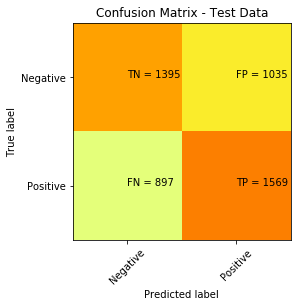

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2430
           1       0.60      0.64      0.62      2466

    accuracy                           0.61      4896
   macro avg       0.61      0.61      0.60      4896
weighted avg       0.61      0.61      0.60      4896



In [33]:
# Decision trees for classification, use entropy criterion (gini by default)
dt3 = tree.DecisionTreeClassifier(max_features='sqrt')
dt3 = dt3.fit(train_x_imp10, train_y)
pred_y_dt3 = dt3.predict(test_x_imp10)
print_cm(metrics.confusion_matrix(test_y, pred_y_dt3))
print(metrics.classification_report(test_y, pred_y_dt3))

In [45]:
# Select the 5 most importance features
train_x_imp5 = train_x[feature_importances.index[range(5)]]
train_x_imp5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14686 entries, 38818 to 29219
Data columns (total 5 columns):
Other City    14686 non-null uint8
Pedestrian    14686 non-null uint8
Night         14686 non-null uint8
Motorcycle    14686 non-null uint8
Wet           14686 non-null uint8
dtypes: uint8(5)
memory usage: 186.4 KB


In [46]:
test_x_imp5 = test_x[feature_importances.index[range(5)]]
test_x_imp5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 25880 to 12978
Data columns (total 5 columns):
Other City    4896 non-null uint8
Pedestrian    4896 non-null uint8
Night         4896 non-null uint8
Motorcycle    4896 non-null uint8
Wet           4896 non-null uint8
dtypes: uint8(5)
memory usage: 62.2 KB


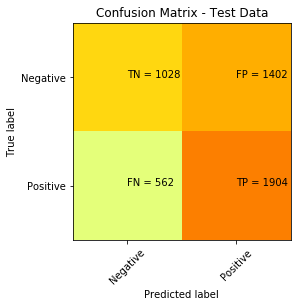

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      2430
           1       0.58      0.77      0.66      2466

    accuracy                           0.60      4896
   macro avg       0.61      0.60      0.59      4896
weighted avg       0.61      0.60      0.59      4896



In [47]:
# Decision trees for classification, use entropy criterion (gini by default)
dt4 = tree.DecisionTreeClassifier(max_features='sqrt')
dt4 = dt4.fit(train_x_imp5, train_y)
pred_y_dt4 = dt4.predict(test_x_imp5)
print_cm(metrics.confusion_matrix(test_y, pred_y_dt4))
print(metrics.classification_report(test_y, pred_y_dt4))

Even though recall for positive cases gets better as we reduce features, we must balance accuracy with predictability. So we will stick with the ten-feature model. 

In [44]:
# visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_x_imp10.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

InvocationException: GraphViz's executables not found